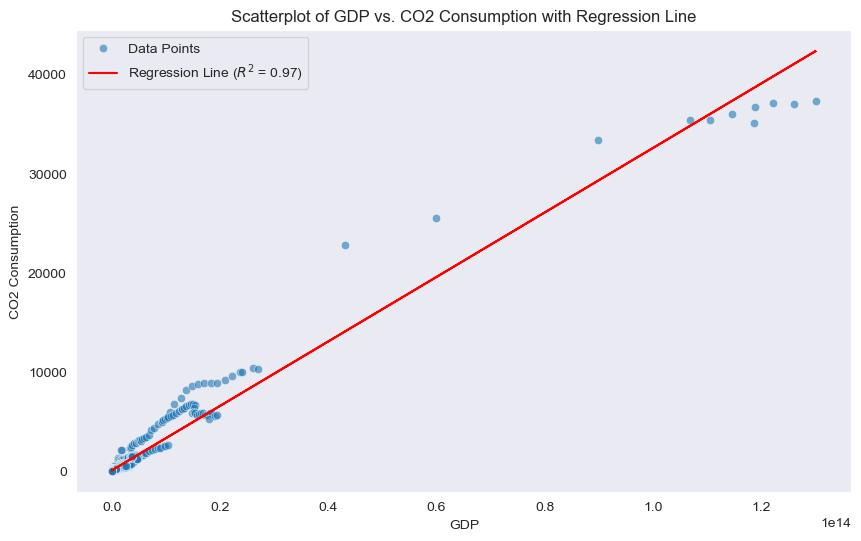

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

cleaned_file_path = '../data/cleaned_emissions_data.csv'
cleaned_data = pd.read_csv(cleaned_file_path)
cleaned_data = cleaned_data.dropna(subset=['gdp', 'consumption_co2'])
gdp = cleaned_data['gdp']
consumption_co2 = cleaned_data['consumption_co2']

X = gdp.values.reshape(-1, 1)
y = consumption_co2.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# calculate R^2
r_squared = r2_score(y, y_pred)

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp, y=consumption_co2, alpha=0.6, label='Data Points')
plt.plot(gdp, y_pred, color='red', label=f'Regression Line ($R^2$ = {r_squared:.2f})')
plt.title('Scatterplot of GDP vs. CO2 Consumption with Regression Line')
plt.xlabel('GDP')
plt.ylabel('CO2 Consumption')
plt.legend()
plt.grid()
plt.show()

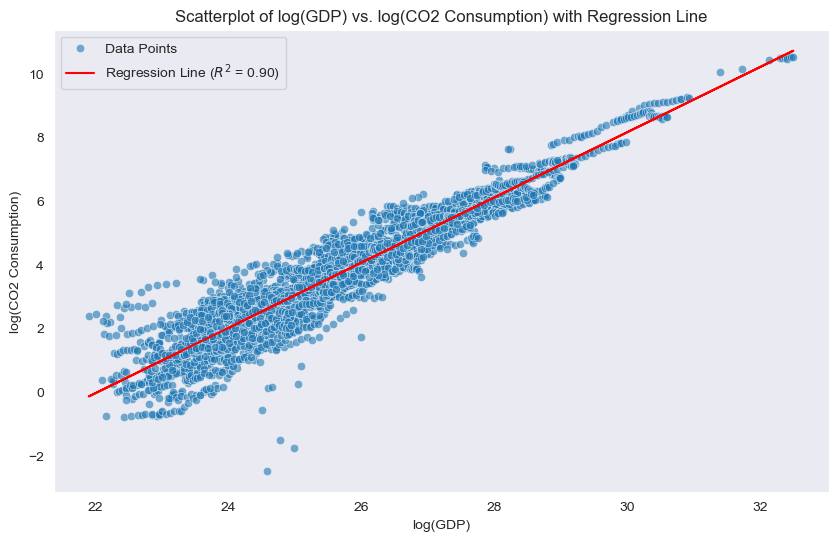

In [20]:
import numpy as np

# filter non-positive GDP or CO2 consumption
cleaned_data = cleaned_data[(cleaned_data['gdp'] > 0) & (cleaned_data['consumption_co2'] > 0)]

# log-transform the data
cleaned_data['log_gdp'] = np.log(cleaned_data['gdp'])
cleaned_data['log_consumption_co2'] = np.log(cleaned_data['consumption_co2'])

# log-transformed data regression
log_gdp = cleaned_data['log_gdp']
log_consumption_co2 = cleaned_data['log_consumption_co2']
X_log = log_gdp.values.reshape(-1, 1)
y_log = log_consumption_co2.values

# linear regression on log-transformed data
model_log = LinearRegression()
model_log.fit(X_log, y_log)
y_pred_log = model_log.predict(X_log)

# calculate R^2
r_squared_log = r2_score(y_log, y_pred_log)

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=log_gdp, y=log_consumption_co2, alpha=0.6, label='Data Points')
plt.plot(log_gdp, y_pred_log, color='red', label=f'Regression Line ($R^2$ = {r_squared_log:.2f})')
plt.title('Scatterplot of log(GDP) vs. log(CO2 Consumption) with Regression Line')
plt.xlabel('log(GDP)')
plt.ylabel('log(CO2 Consumption)')
plt.legend()
plt.grid()

plt.show()


Looking at the relationship between the GDP and CO2 consumption of each country, we initially saw a logistic relationship between the two variables. Because of this, we transformed the two variables with a log transformation. Looking at the scatterplot with the transformed variables, we see the linearity has improved. We then looked at the R squared, or correlation, of this scatterplot. Using this value, we calculated a confidence interval using bootstrapping. We used a 95% confidence level, and even at this high level of confidence, the interval was quite narrow. The values inside the interval were also quite high, so we believe that the correlation between GDP and CO2 consumption of countries is positive and very strong.